In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [438]:
path = r"dset.csv"
df  = pd.read_csv(path)

In [439]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [440]:
df.tail()

,study_hours,student_marks
382,3.561,19.128
383,0.301,5.609
384,7.163,41.444
385,0.309,12.027
386,6.335,32.357


In [441]:
df.shape

(387, 2)

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    382 non-null    float64
 1   student_marks  387 non-null    float64
dtypes: float64(2)
memory usage: 6.2 KB


In [443]:
df.describe()

,study_hours,student_marks
count,382.000000,387.000000
mean,6.608545,66.017233
std,2.326743,26.202398
min,0.050000,5.609000
25%,5.390000,53.258500
50%,6.962000,76.830000
75%,8.417500,83.535000
max,9.910000,89.600000


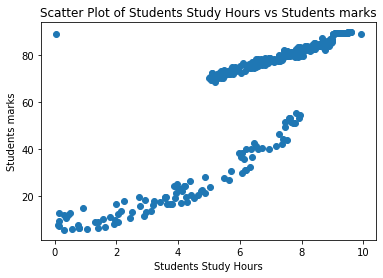

In [444]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

In [445]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [446]:
df.mean()

study_hours       6.608545
student_marks    66.017233
dtype: float64

In [447]:
df2 = df.fillna(df.mean())

In [448]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [449]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.608545,78.68
3,5.670000,71.82
4,8.670000,84.19


In [450]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (387, 1)
shape of y =  (387, 1)


In [451]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (309, 1)
shape of y_train =  (309, 1)
shape of X_test =  (78, 1)
shape of y_test =  (78, 1)


In [452]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [453]:
lr.fit(X_train,y_train)

LinearRegression()

In [454]:
lr.coef_

array([[9.52842314]])

In [455]:
lr.intercept_

array([2.97386968])

In [456]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [457]:
lr.predict([[8.5]])[0][0].round(2)

83.97

In [458]:
y_pred  = lr.predict(X_test)
y_pred


array([[90.06365722],
       [48.51020389],
       [17.80962451],
       [78.72483368],
       [66.84289002],
       [30.68252418],
       [72.62664287],
       [59.3821347 ],
       [78.72483368],
       [85.96643527],
       [93.68445802],
       [24.52716283],
       [82.15506601],
       [66.43316782],
       [54.99906005],
       [89.01553068],
       [91.207068  ],
       [65.7661782 ],
       [74.2464748 ],
       [65.09918858],
       [67.48129437],
       [93.58917379],
       [75.86630674],
       [56.80946045],
       [69.48226323],
       [77.40038286],
       [62.03103633],
       [ 4.30784892],
       [81.67864485],
       [67.29072591],
       [85.49001411],
       [43.56495227],
       [89.3966676 ],
       [80.43994985],
       [21.5924085 ],
       [ 7.81430863],
       [18.49567098],
       [72.15022171],
       [58.61986084],
       [92.54104724],
       [52.71223849],
       [16.38036104],
       [55.7613339 ],
       [80.72580254],
       [68.05299976],
       [70

In [459]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,9.140,89.140,90.063657
1,4.779,22.701,48.510204
2,1.557,10.429,17.809625
3,7.950,82.030,78.724834
4,6.703,40.602,66.842890
...,...,...,...
73,0.771,7.892,10.320284
74,8.880,83.640,87.586267
75,7.620,79.530,75.580454
76,9.150,89.150,90.158941


In [460]:

lr.score(X_test,y_test)


0.8159074226676759

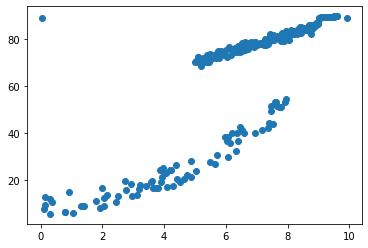

In [461]:
plt.scatter(X_train,y_train)

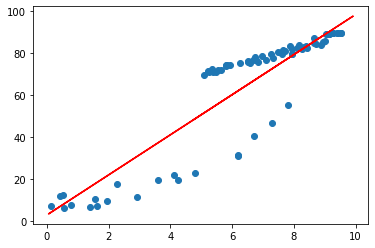

In [462]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")


In [463]:
import joblib
joblib.dump(lr,"mark_predictor.pkl")

['mark_predictor.pkl']

In [464]:
model=joblib.load("mark_predictor.pkl")

In [465]:
model.predict([[8]])[0][0]

79.20125483662817

In [466]:
#linear regression
pred0  = lr.predict(X_test).sum(axis=1)

In [467]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=500,bootstrap=True,max_depth=50,max_features=0.25,min_samples_leaf=7,min_samples_split=10)
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)
print(pred1)

C:\Users\mohda\AppData\Local\Temp/ipykernel_1592/3397992269.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train,y_train)


[89.04712792 24.20717514 12.38058856 78.00796371 76.59384779 15.70446467
 73.50167116 67.06413511 78.00796371 84.51877185 89.48522066 12.3577479
 82.84574502 76.60989537 68.90247655 88.16360886 89.22536704 69.86526782
 66.04138747 67.09203874 76.49642536 89.48390782 65.86163183 64.73895915
 72.62318596 77.20779215 58.0294182  16.44989728 82.77641723 76.51203341
 84.30918935 22.58666999 88.55413187 82.65171624 12.25641225 16.44989728
 12.09781867 73.41286911 67.68638069 89.40546989 70.7350583  12.49913377
 65.7074448  82.69684227 76.43018723 72.68976148 67.93647494 70.67225253
 68.91591051 89.44264183 17.6916643  87.28168985 71.00003261 68.59206423
 78.00796371 89.20402066 58.29021307 58.44979163 87.11799397 88.87510213
 16.44989728 89.24500713 16.44989728 83.84063963 67.93647494 67.01893763
 73.57225163 88.93936382 83.87436147 84.30918935 77.09638788 82.39527052
 22.3571462  16.20247189 85.42839978 65.71558192 89.06101849 70.74002161]


In [468]:
from sklearn.ensemble import GradientBoostingRegressor
model2= GradientBoostingRegressor()
model2.fit(X_train,y_train)
pred2=model2.predict(X_test)
print(pred2)

[88.96029698 22.05855254 10.04257593 78.05263588 75.40805015 16.55785709
 76.02827335 70.77802876 78.05263588 84.27530343 89.10722767 12.61120688
 82.84871446 75.40805015 69.66774076 88.82272453 89.00731611 52.96833715
 66.5418645  69.33472786 75.40805015 89.10722767 58.8227082  67.28636454
 74.36693758 78.31465309 50.70335963  9.66454189 82.84871446 75.40805015
 84.12071886 22.16631746 88.882509   82.84871446 13.10334922  9.66454189
 10.04257593 76.02827335 70.77802876 89.0909982  70.02722226 10.04257593
 70.18326084 82.84871446 75.5505166  74.43793758 70.54747397 70.21407463
 70.02722226 89.10722767 17.92269087 86.44078372 70.21407463 76.40765627
 78.05263588 89.00731611 68.588907   50.70335963 86.44078372 88.91844482
  9.66454189 89.0289001   9.66454189 83.88163047 70.54747397 69.33472786
 76.02827335 88.91844482 83.88163047 84.12071886 78.31465309 81.85015775
 22.16631746  9.66454189 85.56868495 59.77696039 88.96029698 70.02722226]


C:\Users\mohda\anac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [469]:
#accuracy
from sklearn.metrics import r2_score
ensemble_prediction=(pred1*0.4+pred0*0.6+pred2*0.4)
r2_score_ensemble=r2_score(y_test,ensemble_prediction).sum(axis=0)
print("Ensemble MoDEL Accuracy")
out_arr=np.mod(r2_score_ensemble,1)
print(out_arr)


Ensemble MoDEL Accuracy
0.9462360764191726


In [470]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
r2_score1=r2_score(y_test,pred1)
variance_score1=explained_variance_score(y_test,pred1)
mean_absolute_error1=mean_absolute_error(y_test,pred1)
mean_squared_log_error1=mean_squared_log_error(y_test,pred1)

r2_score2=r2_score(y_test,pred2)
variance_score2=explained_variance_score(y_test,pred2)
mean_absolute_error2=mean_absolute_error(y_test,pred2)
mean_squared_log_error2=mean_squared_log_error(y_test,pred2)


r2_score4=r2_score(y_test,pred0)
variance_score4=explained_variance_score(y_test,pred0)
mean_absolute_error4=mean_absolute_error(y_test,pred0)
mean_squared_log_error4=mean_squared_log_error(y_test,pred0)

In [471]:
#printing the values
print("Ranom Forest Regressor Report")
print("-> R2 Score:",r2_score1)
print("->mean absolute error:",mean_absolute_error1)
print("->variance_score:",variance_score1)
print("-> mean squared log error:",mean_squared_log_error1)



#linear regressor
print("\n")
print("Linear Regression Report")
print("-> R2 Score:",r2_score4)
print("->mean absolute error:",mean_absolute_error4)
print("->variance_score:",variance_score4)
print("-> mean squared log error:",mean_squared_log_error4)

#Gradient boosting
print("\n")
print("Gradient Boosting Report")
print("-> R2 Score:",r2_score2)
print("->mean absolute error:",mean_absolute_error2)
print("->variance_score:",variance_score2)
print("-> mean squared log error:",mean_squared_log_error2)


Ranom Forest Regressor Report
-> R2 Score: 0.9002491175348112
->mean absolute error: 5.102991591848249
->variance_score: 0.9003461580762955
-> mean squared log error: 0.058424978129525226


Linear Regression Report
-> R2 Score: 0.8159074226676759
->mean absolute error: 8.889062220544739
->variance_score: 0.8160810014668257
-> mean squared log error: 0.10784519850935857


Gradient Boosting Report
-> R2 Score: 0.8851455670055234
->mean absolute error: 4.8197961791467545
->variance_score: 0.8852157300620376
-> mean squared log error: 0.03855770404561921


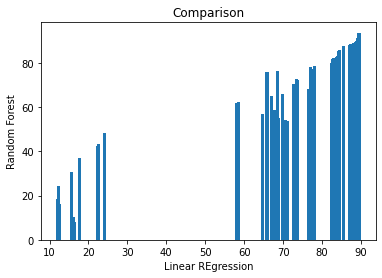

In [472]:
plt.bar(pred1,pred0)
plt.title('Comparison')
plt.xlabel('Linear REgression')
plt.ylabel('Random Forest')
plt.show()

In [473]:
a=r2_score1
b=r2_score4
c=r2_score2
q=variance_score1
w=variance_score2
e=variance_score4
r=mean_absolute_error1
t=mean_absolute_error2
u=mean_absolute_error4
i=mean_squared_log_error1
o=mean_squared_log_error2
p=mean_squared_log_error4

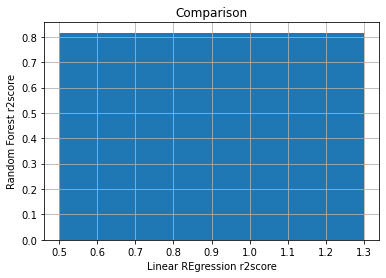

In [474]:
plt.bar(a,b)
plt.title('Comparison')
plt.xlabel('Linear REgression r2score')
plt.ylabel('Random Forest r2score')
plt.grid()
plt.show()

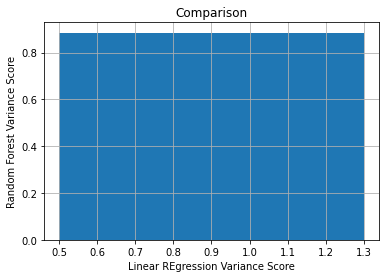

In [475]:
plt.bar(q,w)
plt.title('Comparison')
plt.xlabel('Linear REgression Variance Score')
plt.ylabel('Random Forest Variance Score')
plt.grid()
plt.show()

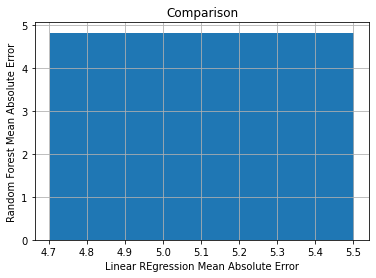

In [476]:
plt.bar(r,t)
plt.title('Comparison')
plt.xlabel('Linear REgression Mean Absolute Error')
plt.ylabel('Random Forest Mean Absolute Error')
plt.grid()
plt.show()

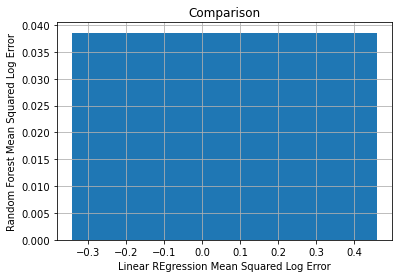

In [477]:
plt.bar(i,o)
plt.title('Comparison')
plt.xlabel('Linear REgression Mean Squared Log Error')
plt.ylabel('Random Forest Mean Squared Log Error')
plt.grid()
plt.show()

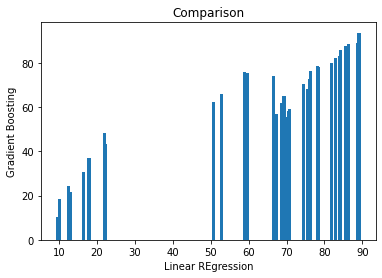

In [478]:
plt.bar(pred2,pred0)
plt.title('Comparison')
plt.xlabel('Linear REgression')
plt.ylabel('Gradient Boosting')
plt.show()

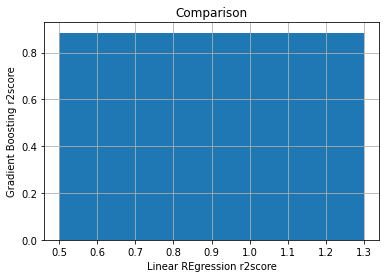

In [479]:
plt.bar(a,c)
plt.title('Comparison')
plt.xlabel('Linear REgression r2score')
plt.ylabel('Gradient Boosting r2score')
plt.grid()
plt.show()

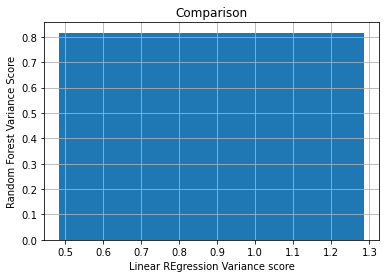

In [480]:
plt.bar(w,e)
plt.title('Comparison')
plt.xlabel('Linear REgression Variance score')
plt.ylabel('Random Forest Variance Score')
plt.grid()
plt.show()

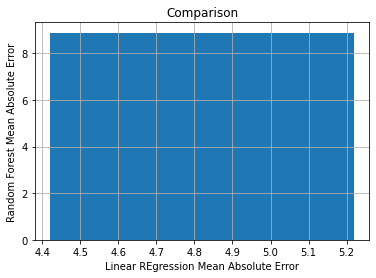

In [481]:
plt.bar(t,u)
plt.title('Comparison')
plt.xlabel('Linear REgression Mean Absolute Error')
plt.ylabel('Random Forest Mean Absolute Error')
plt.grid()
plt.show()

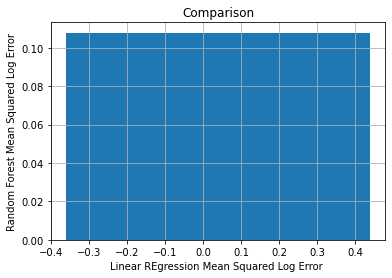

In [482]:
plt.bar(o,p)
plt.title('Comparison')
plt.xlabel('Linear REgression Mean Squared Log Error ')
plt.ylabel('Random Forest Mean Squared Log Error')
plt.grid()
plt.show()